### US ACCIDENTS EXPLORATORY DATA ANALYSIS:

In [24]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

**Loading the dataset**

Source : *https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents*

Description : 

US-Accidents dataset is a country-wide car accident dataset, covering over 49 states of the USA. The accident data has been collected from February 2016 to December 2021, in real-time. 

**Data Preparation and Cleaning:**
1. Load the csv dataset
2. Explore the dataset - some information about the data and columns/features
3. Fix any missing / NULL / incorrect values

In [2]:
# Load the dataset
df = pd.read_csv("../input/us-accidents/US_Accidents_Dec21_updated.csv")
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


**Explore the dataset :**
- Number of features considered
- Types of data
- Preliminary statistics of all features

In [3]:
# Number of rows(data), Number of columns(features)
df.shape

(2845342, 47)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

* Dataset has around 14 x 10^7 records
* 47 different features 
* 13 features of bool type 
* 14 features of float64 type
* 1 feature of int64 type
* 20 features of object type 

How many features/columns are numerical data?

15 [float, int]

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [6]:
# check for missing and null values
df_null = df.isnull().sum()
df_na = df.isna().sum()
df_na

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

Missing data per column % ?

In [7]:
missing_data = df_na.sort_values(ascending=False)*100/len(df)
missing_data

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

<AxesSubplot:>

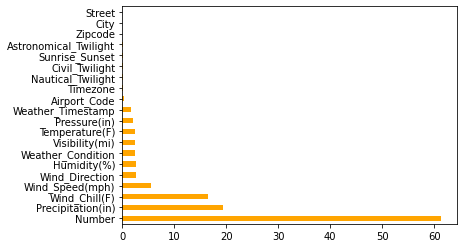

In [8]:
# plot the distribution of missing data 
missing_data[missing_data != 0].plot.barh(x="Attributes", y="Missing data %", color="orange")

In [9]:
# null instances
df_null.sort_values(ascending=False)*100/len(df)

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

Attributes with a lot of missing data or many null instances do not contribute much information or provide much insights during our analysis. Hence we chose to eliminate attribute Number since it has 61% missing data. 

Fixing missing values : 

Numerical data - with mean

Categorical data - with mode (most frequent observation)

In [10]:
# Numerical :
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean())
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean())
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean())
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean())

# Categorical :
df['Weather_Condition']=df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0])

In [11]:
# add Duration(min) attribute in replacement of start and end time
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Duration(min)'] = (df['End_Time'] - df['Start_Time']).astype('timedelta64[m]')

In [12]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Duration(min)'],
      dtype='object')

Civil twilight, Nautical twilight and Astronomical twilight are reflected by the attribute/feature Sunrise_Sunset and hence are considered to be redundant.

In [13]:
df_new = df.drop(columns = ['Start_Time','End_Time','Description','Number','Street','Side','County','Zipcode','Country','Timezone',
                            'Airport_Code','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Weather_Timestamp'])
df_new.head()

,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Temperature(F),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration(min)
0,A-1,3,40.108910,-83.092860,40.112060,-83.031870,3.230,Dublin,OH,42.1,...,False,False,False,False,False,False,False,False,Night,360.0
1,A-2,2,39.865420,-84.062800,39.865010,-84.048730,0.747,Dayton,OH,36.9,...,False,False,False,False,False,False,False,False,Night,360.0
2,A-3,2,39.102660,-84.524680,39.102090,-84.523960,0.055,Cincinnati,OH,36.0,...,False,False,False,False,False,False,False,False,Night,360.0
3,A-4,2,41.062130,-81.537840,41.062170,-81.535470,0.123,Akron,OH,39.0,...,False,False,False,False,False,False,False,False,Night,360.0
4,A-5,3,39.172393,-84.492792,39.170476,-84.501798,0.500,Cincinnati,OH,37.0,...,False,False,False,False,False,False,False,False,Day,360.0


We remove the attributes/features which :
- are redundant to other columns
- are irrelevant to our analysis
- do not contribute significantly to accidents
- are not analyzed properly (format)

In [14]:
df_new.columns

Index(['ID', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'City', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Duration(min)'],
      dtype='object')

We have approached our analysis of accidents by categorizing the attributes into two categories - weather and road conditions. 

Therefore, we have based our insights after:
- analyzing impact of weather conditions on accidents
- analyzing impact of road conditions on accidents

with respect to severity of the accidents

Features reflecting road conditions :

In [15]:
road_df = df_new.drop(columns=['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng','Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Sunrise_Sunset'])
road_df.head()

,ID,Severity,Distance(mi),City,State,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Duration(min)
0,A-1,3,3.230,Dublin,OH,False,False,False,False,False,False,False,False,False,False,False,False,False,360.0
1,A-2,2,0.747,Dayton,OH,False,False,False,False,False,False,False,False,False,False,False,False,False,360.0
2,A-3,2,0.055,Cincinnati,OH,False,False,False,False,True,False,False,False,False,False,False,False,False,360.0
3,A-4,2,0.123,Akron,OH,False,False,False,False,False,False,False,False,False,False,False,False,False,360.0
4,A-5,3,0.500,Cincinnati,OH,False,False,False,False,False,False,False,False,False,False,False,False,False,360.0


Features describing weather conditions :

In [16]:
weather_df = df_new.drop(columns=['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng','Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop'])
weather_df.head()

,ID,Severity,Distance(mi),City,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Duration(min)
0,A-1,3,3.230,Dublin,OH,42.1,36.100000,58.0,29.76,10.0,SW,10.400000,0.000000,Light Rain,Night,360.0
1,A-2,2,0.747,Dayton,OH,36.9,59.658231,91.0,29.68,10.0,Calm,7.395044,0.020000,Light Rain,Night,360.0
2,A-3,2,0.055,Cincinnati,OH,36.0,59.658231,97.0,29.70,10.0,Calm,7.395044,0.020000,Overcast,Night,360.0
3,A-4,2,0.123,Akron,OH,39.0,59.658231,55.0,29.65,10.0,Calm,7.395044,0.007017,Overcast,Night,360.0
4,A-5,3,0.500,Cincinnati,OH,37.0,29.800000,93.0,29.69,10.0,WSW,10.400000,0.010000,Light Rain,Day,360.0


**Distribution of Accidents based on Severity (%) :**

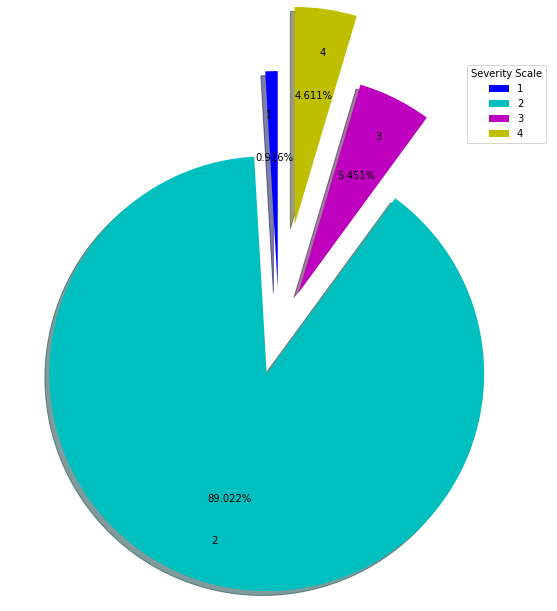

In [17]:
# Percentage Severity Distribution 
severity_df = df_new.groupby(['Severity']).agg(count=('Severity', 'count'))
severity_df = severity_df.reset_index()
severity_ratio = severity_df['count']*100/severity_df['count'].sum()

# Plot 
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.pie(severity_ratio, labels=[1,2,3,4],  explode=[0.2,0.2,0.2,0.5], labeldistance=0.8, 
       autopct='%1.3f%%', shadow=True, startangle=90, colors=['b','c','m','y'])
ax.legend(title='Severity Scale')
plt.show()

In [18]:
road_df.columns

Index(['ID', 'Severity', 'Distance(mi)', 'City', 'State', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Duration(min)'],
      dtype='object')

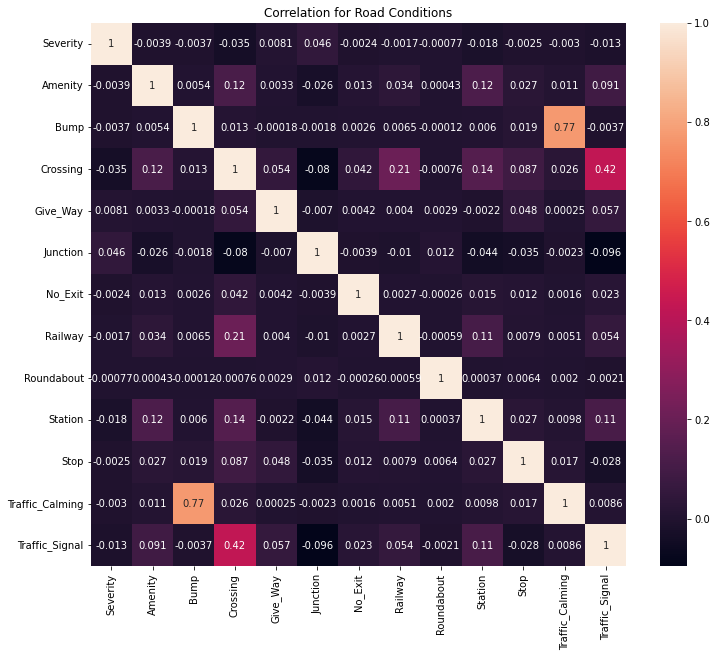

In [19]:
road_corr = road_df.drop(columns=['ID', 'City', 'State', 'Distance(mi)','Duration(min)','Turning_Loop']).corr()
r = road_corr.index
plt.figure(figsize=(12,10))
rc = sns.heatmap(road_df[r].corr(),annot=True).set_title('Correlation for Road Conditions');

We are mostly interested in the correlations between Severity and other attributes : 
- Crossing has negative relationship with severity of weak strength 
- Junction has slightly higher positive relationship with severity
- Most of the attributes have fairly weak and mostly negative correlations with severity
- Railway and Roundabout have very weak correlations with severity

There certain correlations that standout in the heatmap :
*  Traffic_Calming & Bump, Traffic_Signal & Crossing and Railway & Crossing have positive correlation with fair strength

This is to be expected as these road features/conditions are found together.

In [20]:
road_df = road_df.drop(columns=['Railway', 'Roundabout'])

In [21]:
weather_df.columns

Index(['ID', 'Severity', 'Distance(mi)', 'City', 'State', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Sunrise_Sunset', 'Duration(min)'],
      dtype='object')

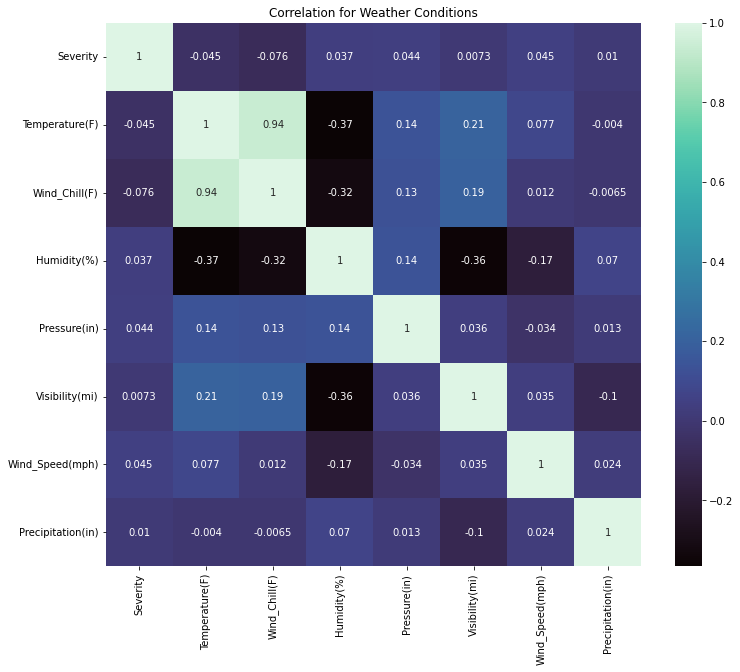

In [22]:
weather_corr = weather_df.drop(columns=['ID', 'City', 'State', 'Distance(mi)','Duration(min)']).corr()
w = weather_corr.index
plt.figure(figsize=(12,10))
wc = sns.heatmap(weather_df[w].corr(),annot=True,
                 cmap=sns.color_palette("mako", as_cmap=True)).set_title('Correlation for Weather Conditions');

Accident distribution by Severity and Weather conditions : 

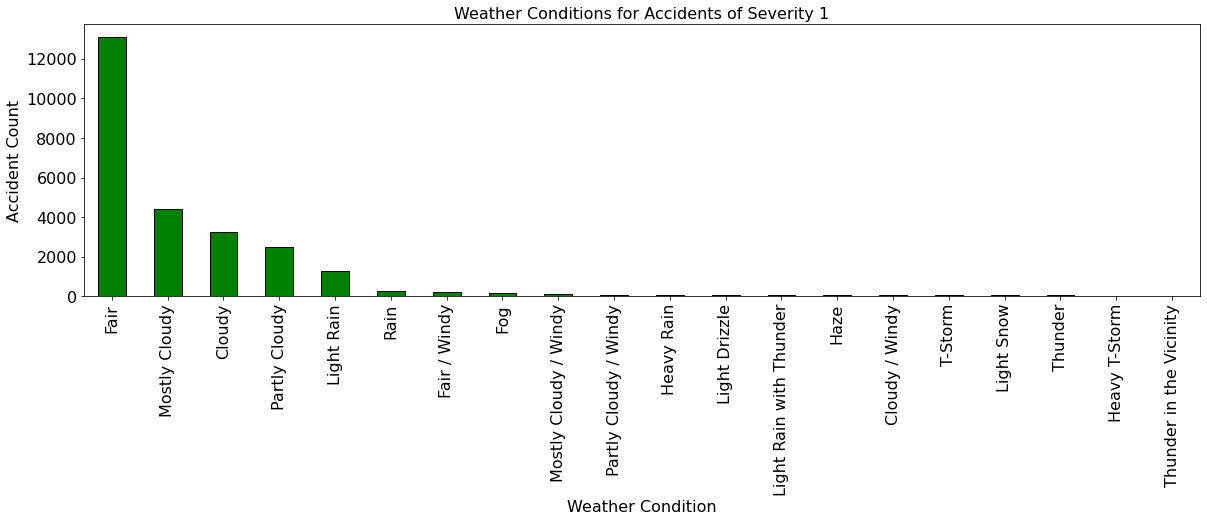

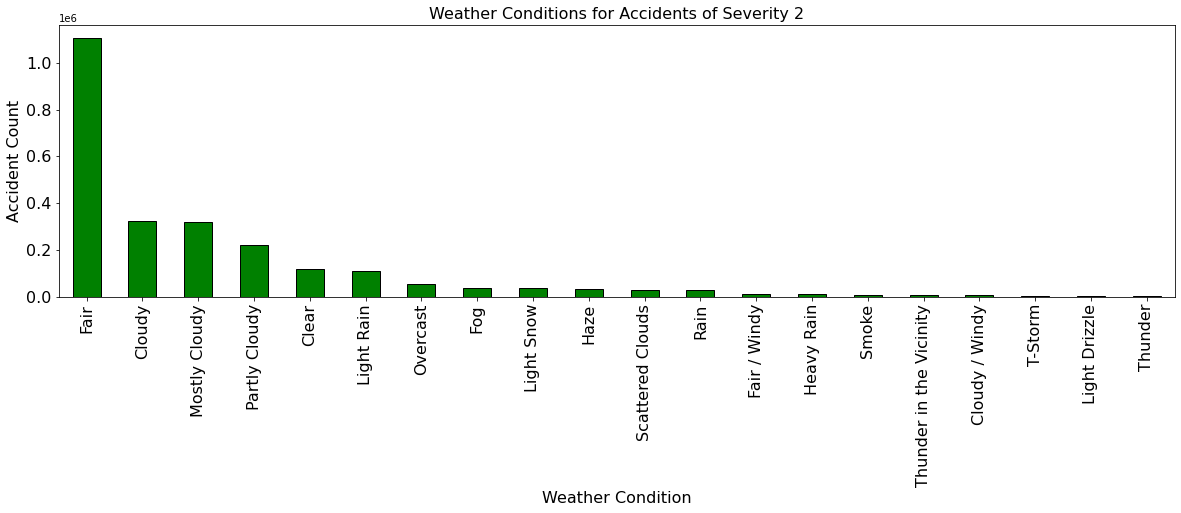

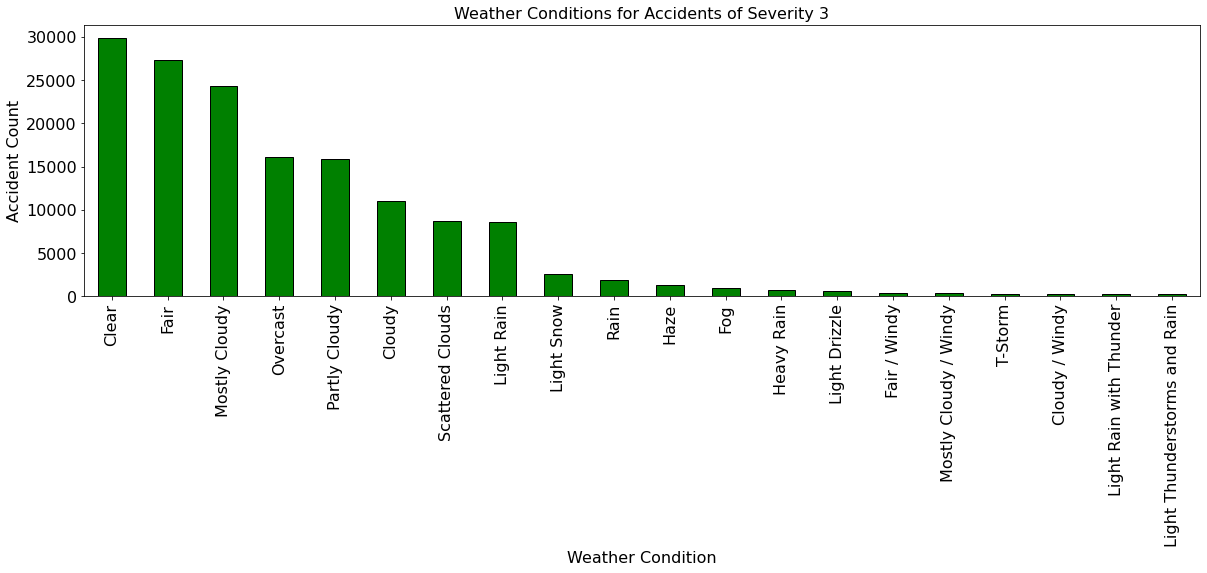

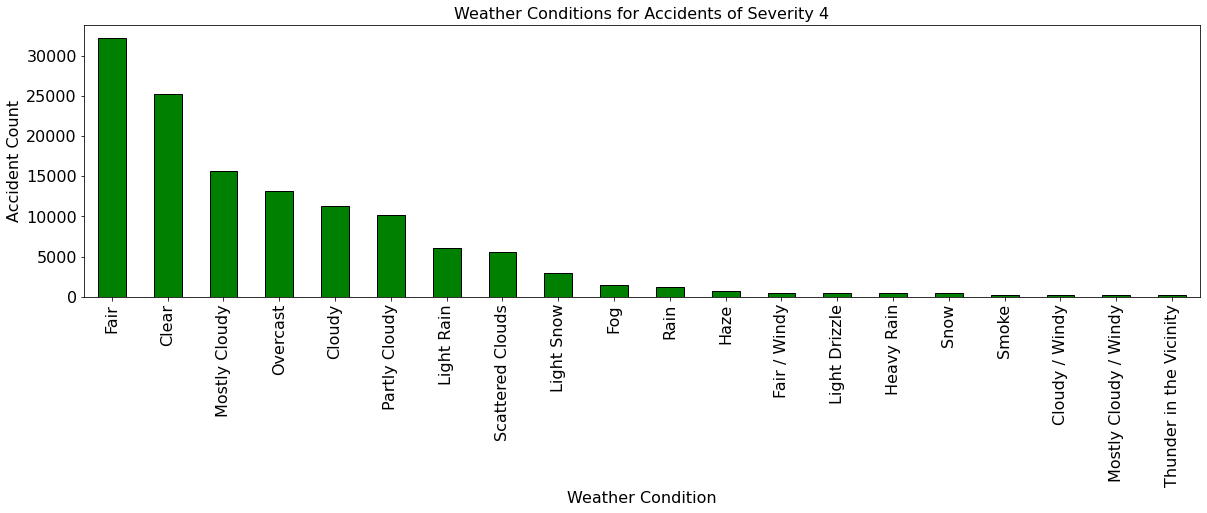

In [25]:
for x in np.arange(1,5):
    plt.subplots(figsize=(20,5))
    df.loc[df["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='g',
                                                                                                                   edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('Weather Conditions for Accidents of Severity ' + str(x),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)